# Fitzhugh-Nagumo simplified action-potential model

This example shows how the [Fitzhugh-Nagumo simplified action potential (AP) model](http://www.scholarpedia.org/article/FitzHugh-Nagumo_model) can be used.

The model is based on a simplification and state-reduction of the original squid axon model by Hodgkind and Huxley.
It has two state variables, a voltage-like variable and a recovery variable.


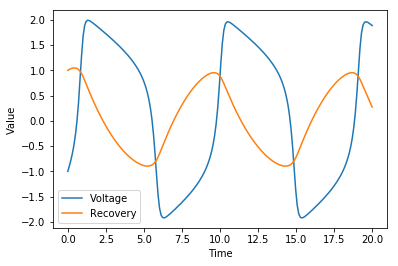

In [2]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create a model
model = pints.toy.FitzhughNagumoModel()

# Run a simulation
parameters = [0.1, 0.5, 3]
times = np.linspace(0, 20, 200)
values = model.simulate(parameters, times)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values)
plt.legend(['Voltage', 'Recovery'])
plt.show()

With these parameters, the model creates wide AP waveforms that are more reminiscent of muscle cells than neurons.

We now set up a simple optimisation problem with the model.

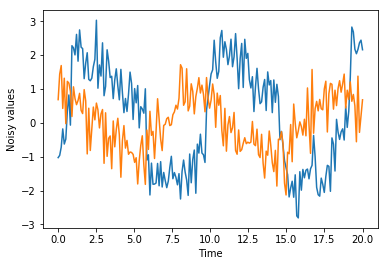

In [3]:
# First add some noise
sigma = 0.5
noisy = values + np.random.normal(0, sigma, values.shape)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Noisy values')
plt.plot(times, noisy)
plt.show()

Next, we set up a problem. Because this model has multiple outputs (2), we use a [MultiOutputProblem](http://pints.readthedocs.io/en/latest/core_classes_and_methods.html#multi-output-problem).

In [4]:
problem = pints.MultiOutputProblem(model, times, noisy)
score = pints.SumOfSquaresError(problem)

Finally, we choose a wide set of boundaries and run!

In [6]:
# Select boundaries
boundaries = pints.RectangularBoundaries([0., 0., 0.], [10., 10., 10.])

# Select a starting point
x0 = [1, 1, 1]

# Perform an optimization
found_parameters, found_value = pints.optimise(score, x0, boundaries=boundaries)

print('Score at true solution:')
print(score(parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(parameters[k]))

Minimising error measure
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Time m:s
0     7      127.0827   0:00.1
1     14     117.8888   0:00.1
2     21     117.8888   0:00.2
3     28     117.8888   0:00.2
20    147    99.19318   0:01.1
40    287    98.54404   0:02.6
60    427    97.38433   0:03.9
80    567    97.3809    0:05.3
100   707    97.38089   0:06.7
120   847    97.38089   0:08.1
140   987    97.38089   0:09.5
160   1127   97.38089   0:10.8
180   1267   97.38089   0:12.2
200   1407   97.38089   0:13.5
220   1547   97.38089   0:14.9
240   1687   97.38089   0:16.3
260   1827   97.38089   0:17.7
280   1967   97.38089   0:19.0
300   2107   97.38089   0:20.4
320   2247   97.38089   0:21.8
340   2387   97.38089   0:23.1
352   2464   97.38089   0:23.9
Halting: No significant change for 200 iterations.
Score at true solution:
97.9741239736
Found solution:          True parameters:
 1.22170597921944568e

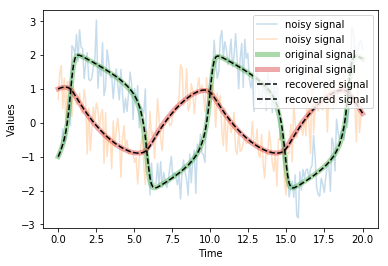

In [21]:
# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, noisy, '-', alpha=0.25, label='noisy signal')
plt.plot(times, values, alpha=0.4, lw=5, label='original signal')
plt.plot(times, problem.evaluate(found_parameters), 'k--', label='recovered signal')
plt.legend()
plt.show()

This shows the parameters are not retrieved entirely correctly, but the traces still strongly overlap.